In [33]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [35]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [36]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [37]:
tf.keras.backend.clear_session()

In [38]:
subject = 'Bahia - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [39]:
data = pd.read_csv('2003_raw_Bahia_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Bahia - PIB - Per Capita,Bahia - PIB - Preços de Mercado,Bahia - PIB - Estadual,Bahia - PIB - Construção Civil,Bahia - População,Bahia - INCC (%),Bahia - IPCA - Variação mensal durante o Plano Real (%),Bahia - IGP-DI,Bahia - Taxa Selic (%),Bahia - IDH - Longevidade,Bahia - IDH - Renda,Bahia - IDH - Educação,Bahia - NFSP - Fluxo Mensal (Milhões de reais),Bahia - Estoque liquido de capital fixo - (R$),Bahia - Desemprego,Bahia - Produção de Cimento (t),Bahia - Valor,Bahia - Consumo de Cimento (t)
0,2003-01-01,7.990762e+06,4.206227e+06,0.599762,7.050330e+06,13323212.0,1.70,12.53,2.70,0.082293,0.68,0.594,0.332,3.46,6.098524e+06,10.735432,NaN,0.3100,151297.0
1,2003-02-01,7.990762e+06,4.206227e+06,0.599762,7.050330e+06,13323212.0,1.51,2.25,2.17,0.088771,0.68,0.594,0.332,3.59,6.172460e+06,10.735432,NaN,0.3200,138707.0
2,2003-03-01,7.990762e+06,4.206227e+06,0.599762,7.050330e+06,13323212.0,1.39,3.86,1.59,0.090733,0.68,0.594,0.332,3.84,6.172460e+06,10.735432,NaN,0.3300,135009.0
3,2003-04-01,7.990762e+06,4.206227e+06,0.599762,7.050330e+06,13323212.0,1.38,5.13,1.66,0.092749,0.68,0.594,0.332,3.95,6.172460e+06,10.735432,40182.0,0.3400,126554.0
4,2003-05-01,7.990762e+06,4.206227e+06,0.599762,7.050330e+06,13323212.0,0.90,6.15,0.41,0.092758,0.68,0.594,0.332,4.06,6.172460e+06,10.735432,105642.0,0.3400,137331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,1.237320e+07,2.087782e+07,0.835315,7.452787e+06,14812617.0,0.58,2.42,-0.01,0.024620,0.81,0.690,0.650,0.69,7.827728e+06,12.300000,546364.0,0.5334,281466.0
200,2019-09-01,1.237320e+07,2.087782e+07,0.835315,7.452787e+06,14812617.0,0.42,2.54,-0.51,0.022751,0.81,0.690,0.650,0.62,7.827728e+06,12.000000,21042.0,0.5294,285535.0
201,2019-10-01,1.237320e+07,2.087782e+07,0.835315,7.452787e+06,14812617.0,0.46,2.49,0.50,0.022035,0.81,0.690,0.650,0.59,7.827728e+06,11.900000,285506.0,0.5294,328259.0
202,2019-11-01,1.237320e+07,2.087782e+07,0.835315,7.452787e+06,14812617.0,0.18,2.60,0.55,0.020790,0.81,0.690,0.650,0.57,7.827728e+06,11.700000,122800.0,0.5294,298078.0


In [40]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      139.997
1      111.865
2      159.603
3      142.063
4      137.144
        ...   
199        NaN
200        NaN
201        NaN
202        NaN
203        NaN
Name: Bahia - Consumo de Cimento (t), Length: 204, dtype: float64

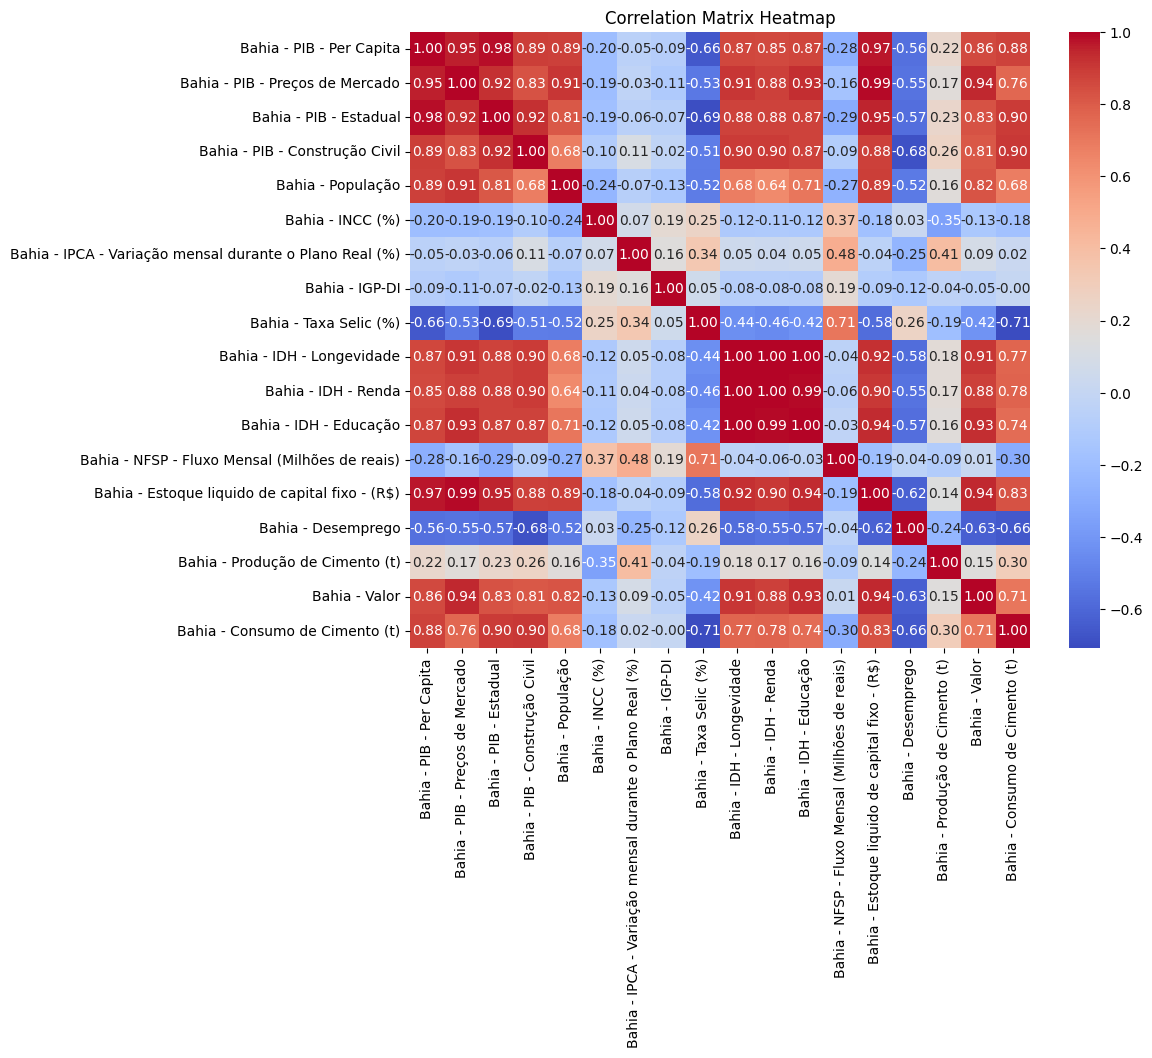

In [41]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [42]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Bahia - PIB - Per Capita,Bahia - PIB - Preços de Mercado,Bahia - PIB - Estadual,Bahia - PIB - Construção Civil,Bahia - População,Bahia - INCC (%),Bahia - IPCA - Variação mensal durante o Plano Real (%),Bahia - IGP-DI,Bahia - Taxa Selic (%),Bahia - IDH - Longevidade,Bahia - IDH - Renda,Bahia - IDH - Educação,Bahia - NFSP - Fluxo Mensal (Milhões de reais),Bahia - Estoque liquido de capital fixo - (R$),Bahia - Desemprego,Bahia - Produção de Cimento (t),Bahia - Valor
0,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.998868,4.052332,3.466715,2.303195,-0.929676,-0.934342,-0.918888,3.108599,-1.539424,0.529261,-1.000000,-1.400521
1,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.647487,-0.596188,2.630940,2.745235,-0.929676,-0.934342,-0.918888,3.275709,-1.411460,0.529261,-1.000000,-1.194250
2,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.425561,0.131839,1.716318,2.879123,-0.929676,-0.934342,-0.918888,3.597074,-1.411460,0.529261,-1.000000,-0.987980
3,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.407068,0.706121,1.826703,3.016721,-0.929676,-0.934342,-0.918888,3.738475,-1.411460,0.529261,-0.833000,-0.781710
4,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,0.519367,1.167355,-0.144465,3.017322,-0.929676,-0.934342,-0.918888,3.879875,-1.411460,0.529261,-0.491351,-0.781710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.137942,1.788828,0.912362,0.238040,1.586750,-0.590259,-0.966985,-1.264088,-0.729479,1.319541,1.239434,1.478212,-0.374997,1.441346,1.293579,1.161841,1.425383
176,1.137942,1.788828,0.912362,0.238040,1.586750,-0.479297,-0.881068,-0.412544,-0.941281,1.319541,1.239434,1.478212,-0.439270,1.441346,1.293579,-0.849513,1.763666
177,1.137942,1.788828,0.912362,0.238040,1.586750,-1.034110,-0.808718,0.186692,-1.140710,1.319541,1.239434,1.478212,-0.503543,1.441346,1.293579,-0.306195,1.899804
178,1.137942,1.788828,0.912362,0.238040,1.586750,-0.571766,-0.614276,-0.633314,-1.226481,1.319541,1.239434,1.478212,-0.503543,1.441346,1.359210,-0.334044,2.035943


In [43]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Bahia - PIB - Per Capita,Bahia - PIB - Preços de Mercado,Bahia - PIB - Estadual,Bahia - PIB - Construção Civil,Bahia - População,Bahia - INCC (%),Bahia - IPCA - Variação mensal durante o Plano Real (%),Bahia - IGP-DI,Bahia - Taxa Selic (%),Bahia - IDH - Longevidade,Bahia - IDH - Renda,Bahia - IDH - Educação,Bahia - NFSP - Fluxo Mensal (Milhões de reais),Bahia - Estoque liquido de capital fixo - (R$),Bahia - Desemprego,Bahia - Produção de Cimento (t),Bahia - Valor
0,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.998868,4.052332,3.466715,2.303195,-0.929676,-0.934342,-0.918888,3.108599,-1.539424,0.529261,-1.000000,-1.400521
1,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.647487,-0.596188,2.630940,2.745235,-0.929676,-0.934342,-0.918888,3.275709,-1.411460,0.529261,-1.000000,-1.194250
2,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.425561,0.131839,1.716318,2.879123,-0.929676,-0.934342,-0.918888,3.597074,-1.411460,0.529261,-1.000000,-0.987980
3,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,1.407068,0.706121,1.826703,3.016721,-0.929676,-0.934342,-0.918888,3.738475,-1.411460,0.529261,-0.833000,-0.781710
4,-1.614880,-1.360044,-1.566187,-0.746588,-1.558591,0.519367,1.167355,-0.144465,3.017322,-0.929676,-0.934342,-0.918888,3.879875,-1.411460,0.529261,-0.491351,-0.781710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.321976,1.570295,1.195476,0.863587,1.468830,-0.238878,0.629248,-1.406012,0.272188,1.146524,1.039218,1.332047,0.794771,1.416222,-0.675351,-1.000000,1.540894
164,1.321976,1.570295,1.195476,0.863587,1.468830,-0.608753,0.837256,-0.112926,0.272188,1.146524,1.039218,1.332047,0.730498,1.416222,-0.609720,-1.000000,1.181984
165,1.321976,1.570295,1.195476,0.863587,1.468830,-0.534778,0.877953,-0.743700,0.272188,1.146524,1.039218,1.332047,0.743353,1.416222,-0.544089,-1.000000,1.256241
166,1.321976,1.570295,1.195476,0.863587,1.468830,-0.756703,1.000045,-0.586006,0.248413,1.146524,1.039218,1.332047,0.614807,1.416222,-0.544089,-1.000000,1.425383


In [44]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      139.997
1      111.865
2      159.603
3      142.063
4      137.144
        ...   
163    292.688
164    258.881
165    276.879
166    255.774
167    208.326
Name: Bahia - Consumo de Cimento (t), Length: 168, dtype: float64

In [45]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [46]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [47]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Bahia - PIB - Per Capita,Bahia - PIB - Preços de Mercado,Bahia - PIB - Estadual,Bahia - PIB - Construção Civil,Bahia - População,Bahia - INCC (%),Bahia - IPCA - Variação mensal durante o Plano Real (%),Bahia - IGP-DI,Bahia - Taxa Selic (%),Bahia - IDH - Longevidade,Bahia - IDH - Renda,Bahia - IDH - Educação,Bahia - NFSP - Fluxo Mensal (Milhões de reais),Bahia - Estoque liquido de capital fixo - (R$),Bahia - Desemprego,Bahia - Produção de Cimento (t),Bahia - Valor
132,0.967580,0.902393,0.852789,1.348340,1.212487,-0.960135,1.058830,0.297077,-0.755853,1.146524,1.039218,0.966636,-0.285015,0.834026,-1.725448,3.249714,0.843700
133,0.967580,0.902393,0.852789,1.348340,1.212487,0.482379,-1.364912,-0.160234,-0.688658,1.146524,1.039218,0.966636,-0.349288,1.129318,-1.397293,-1.000000,0.897331
134,0.967580,0.902393,0.852789,1.348340,1.212487,-0.534778,-1.052901,0.549386,-0.626634,1.146524,1.039218,0.966636,-0.374997,1.129318,-1.200399,-1.000000,0.988090
135,0.967580,0.902393,0.852789,1.348340,1.212487,-0.627247,-0.627842,1.542855,-0.571481,1.146524,1.039218,0.966636,-0.259306,1.129318,-1.331662,-1.000000,1.124228
136,0.967580,0.902393,0.852789,1.348340,1.212487,0.482379,-0.320352,-0.081387,-0.516512,1.146524,1.039218,0.966636,-0.053632,1.129318,-1.462924,0.004556,1.124228
137,0.967580,0.902393,0.852789,1.348340,1.212487,2.646150,-0.107822,-1.500628,-0.510405,1.146524,1.039218,0.966636,0.023495,1.129318,-1.594186,-1.000000,1.181984
138,0.967580,0.902393,0.852789,1.348340,1.212487,0.075516,0.082098,-1.784477,-0.510405,1.146524,1.039218,0.966636,-0.002214,1.129318,-1.659817,-1.000000,1.210861
139,0.967580,0.902393,0.852789,1.348340,1.212487,0.241960,0.086620,-1.658322,-0.510405,1.146524,1.039218,0.966636,-0.143614,1.129318,-1.791079,-1.000000,1.219112
140,0.967580,0.902393,0.852789,1.348340,1.212487,-0.997122,0.204189,-0.696392,-0.510054,1.146524,1.039218,0.966636,-0.182178,1.129318,-1.922341,-0.513982,1.219112
141,0.967580,0.902393,0.852789,1.348340,1.212487,-0.867666,0.470982,-0.759469,-0.510405,1.146524,1.039218,0.966636,-0.105051,1.129318,-2.053603,-1.000000,1.396505


In [48]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [49]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [50]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [51]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [52]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1068556221, 385431698, 1206515708, 3372467834, 631164780, 127639956, 3560992444, 3822631211, 3971690140, 1713956266]


Step: 0 ___________________________________________
val_loss: 757.1461181640625
winner_seed: 1068556221


Step: 1 ___________________________________________
val_loss: 872.923828125


Step: 2 ___________________________________________
val_loss: 651.833251953125
winner_seed: 1206515708


Step: 3 ___________________________________________
val_loss: 666.6513061523438


Step: 4 ___________________________________________
val_loss: 910.4776611328125


Step: 5 ___________________________________________
val_loss: 833.4676513671875


Step: 6 ___________________________________________
val_loss: 824.0994262695312


Step: 7 ___________________________________________
val_loss: 702.836669921875


Step: 8 ___________________________________________
val_loss: 881.4942626953125


Step: 9 ___________________________________________
val_loss: 1132.4150390625


final_seed: 12065157

In [53]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 2536234443

Epoch 1/10000
4/4 [==============================] - 2s 125ms/step - loss: 57631.0039 - val_loss: 2782.6572
Epoch 2/10000
4/4 [==============================] - 0s 10ms/step - loss: 2445.2805 - val_loss: 3028.4431
Epoch 3/10000
4/4 [==============================] - 0s 10ms/step - loss: 2407.2700 - val_loss: 3921.6238
Epoch 4/10000
4/4 [==============================] - 0s 10ms/step - loss: 2282.5710 - val_loss: 1785.9255
Epoch 5/10000
4/4 [==============================] - 0s 10ms/step - loss: 2365.6182 - val_loss: 2213.6213
Epoch 6/10000
4/4 [==============================] - 0s 10ms/step - loss: 2466.3889 - val_loss: 2322.5962
Epoch 7/10000
4/4 [==============================] - 0s 10ms/step - loss: 2286.9590 - val_loss: 2139.9727
Epoch 8/10000
4/4 [==============================] - 0s 10ms/step - loss: 2324.8264 - val_loss: 2911.1025
Epoch 9/10000
4/4 [==============================] - 0s 9ms/step - loss: 2310.6050 - val_loss: 2586.2017
Epoch 10/10000
4/4 [=========================

4/4 [==============================] - 0s 8ms/step - loss: 119.9572 - val_loss: 701.6633
Epoch 157/10000
4/4 [==============================] - 0s 8ms/step - loss: 104.2134 - val_loss: 706.4385
Epoch 158/10000
4/4 [==============================] - 0s 8ms/step - loss: 180.7464 - val_loss: 813.7902
Epoch 159/10000
4/4 [==============================] - 0s 9ms/step - loss: 168.1650 - val_loss: 758.1366
Epoch 160/10000
4/4 [==============================] - 0s 9ms/step - loss: 121.2414 - val_loss: 741.4033
Epoch 161/10000
4/4 [==============================] - 0s 9ms/step - loss: 117.7831 - val_loss: 746.3370
Epoch 162/10000
4/4 [==============================] - 0s 8ms/step - loss: 120.3089 - val_loss: 718.5662
Epoch 163/10000
4/4 [==============================] - 0s 10ms/step - loss: 326.6116 - val_loss: 779.7239
Epoch 164/10000
4/4 [==============================] - 0s 10ms/step - loss: 238.2782 - val_loss: 726.0017
Epoch 165/10000
4/4 [==============================] - 0s 8ms/step - 

4/4 [==============================] - 0s 9ms/step - loss: 59.7313 - val_loss: 763.2002
Epoch 313/10000
4/4 [==============================] - 0s 10ms/step - loss: 46.0097 - val_loss: 777.2743
Epoch 314/10000
4/4 [==============================] - 0s 10ms/step - loss: 91.3672 - val_loss: 812.4803
Epoch 315/10000
4/4 [==============================] - 0s 10ms/step - loss: 51.1108 - val_loss: 728.5589
Epoch 316/10000
4/4 [==============================] - 0s 10ms/step - loss: 39.4019 - val_loss: 759.1917
Epoch 317/10000
4/4 [==============================] - 0s 10ms/step - loss: 36.2628 - val_loss: 714.2371
Epoch 318/10000
4/4 [==============================] - 0s 9ms/step - loss: 49.7844 - val_loss: 776.5566
Epoch 319/10000
4/4 [==============================] - 0s 9ms/step - loss: 38.1864 - val_loss: 721.1412
Epoch 320/10000
4/4 [==============================] - 0s 9ms/step - loss: 47.0871 - val_loss: 740.1946
Epoch 321/10000
4/4 [==============================] - 0s 10ms/step - loss:

4/4 [==============================] - 0s 10ms/step - loss: 27.4948 - val_loss: 749.2925
Epoch 469/10000
4/4 [==============================] - 0s 11ms/step - loss: 27.8941 - val_loss: 730.3179
Epoch 470/10000
4/4 [==============================] - 0s 12ms/step - loss: 34.3043 - val_loss: 692.9303
Epoch 471/10000
4/4 [==============================] - 0s 12ms/step - loss: 29.1436 - val_loss: 734.1308
Epoch 472/10000
4/4 [==============================] - 0s 10ms/step - loss: 40.6777 - val_loss: 711.0492
Epoch 473/10000
4/4 [==============================] - 0s 9ms/step - loss: 28.6321 - val_loss: 719.9731
Epoch 474/10000
4/4 [==============================] - 0s 11ms/step - loss: 29.4997 - val_loss: 730.5073
Epoch 475/10000
4/4 [==============================] - 0s 11ms/step - loss: 31.6642 - val_loss: 705.9588
Epoch 476/10000
4/4 [==============================] - 0s 11ms/step - loss: 36.2624 - val_loss: 718.9693
Epoch 477/10000
4/4 [==============================] - 0s 11ms/step - lo

4/4 [==============================] - 0s 10ms/step - loss: 25.2524 - val_loss: 675.5469
Epoch 625/10000
4/4 [==============================] - 0s 12ms/step - loss: 26.5670 - val_loss: 770.1416
Epoch 626/10000
4/4 [==============================] - 0s 11ms/step - loss: 29.6674 - val_loss: 711.9716
Epoch 627/10000
4/4 [==============================] - 0s 12ms/step - loss: 23.7456 - val_loss: 704.4951
Epoch 628/10000
4/4 [==============================] - 0s 11ms/step - loss: 23.4805 - val_loss: 703.5403
Epoch 629/10000
4/4 [==============================] - 0s 12ms/step - loss: 24.6707 - val_loss: 719.8328
Epoch 630/10000
4/4 [==============================] - 0s 10ms/step - loss: 26.3428 - val_loss: 706.6041
Epoch 631/10000
4/4 [==============================] - 0s 10ms/step - loss: 29.7077 - val_loss: 765.9944
Epoch 632/10000
4/4 [==============================] - 0s 11ms/step - loss: 22.5061 - val_loss: 697.7134
Epoch 633/10000
4/4 [==============================] - 0s 10ms/step - l

4/4 [==============================] - 0s 10ms/step - loss: 30.2788 - val_loss: 725.6700
Epoch 781/10000
4/4 [==============================] - 0s 10ms/step - loss: 24.5187 - val_loss: 708.1717
Epoch 782/10000
4/4 [==============================] - 0s 11ms/step - loss: 22.1767 - val_loss: 713.9272
Epoch 783/10000
4/4 [==============================] - 0s 11ms/step - loss: 20.3801 - val_loss: 675.7937
Epoch 784/10000
4/4 [==============================] - 0s 10ms/step - loss: 22.3920 - val_loss: 695.2918
Epoch 785/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.0526 - val_loss: 698.5867
Epoch 786/10000
4/4 [==============================] - 0s 8ms/step - loss: 21.9646 - val_loss: 679.2373
Epoch 787/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.4371 - val_loss: 696.5062
Epoch 788/10000
4/4 [==============================] - 0s 9ms/step - loss: 31.5284 - val_loss: 751.4847
Epoch 789/10000
4/4 [==============================] - 0s 9ms/step - loss: 

4/4 [==============================] - 0s 8ms/step - loss: 18.1980 - val_loss: 691.6808
Epoch 937/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.1264 - val_loss: 706.3331
Epoch 938/10000
4/4 [==============================] - 0s 11ms/step - loss: 18.4969 - val_loss: 699.1171
Epoch 939/10000
4/4 [==============================] - 0s 11ms/step - loss: 18.8548 - val_loss: 713.7572
Epoch 940/10000
4/4 [==============================] - 0s 11ms/step - loss: 19.0525 - val_loss: 677.2358
Epoch 941/10000
4/4 [==============================] - 0s 12ms/step - loss: 24.6938 - val_loss: 682.5760
Epoch 942/10000
4/4 [==============================] - 0s 11ms/step - loss: 21.2842 - val_loss: 701.4392
Epoch 943/10000
4/4 [==============================] - 0s 11ms/step - loss: 18.4509 - val_loss: 761.0029
Epoch 944/10000
4/4 [==============================] - 0s 11ms/step - loss: 24.4475 - val_loss: 702.0637
Epoch 945/10000
4/4 [==============================] - 0s 10ms/step - los

Epoch 1092/10000
4/4 [==============================] - 0s 10ms/step - loss: 20.9453 - val_loss: 697.5234
Epoch 1093/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.7408 - val_loss: 698.8965
Epoch 1094/10000
4/4 [==============================] - 0s 8ms/step - loss: 19.2021 - val_loss: 731.6462
Epoch 1095/10000
4/4 [==============================] - 0s 8ms/step - loss: 19.1458 - val_loss: 661.8483
Epoch 1096/10000
4/4 [==============================] - 0s 8ms/step - loss: 19.8596 - val_loss: 657.2991
Epoch 1097/10000
4/4 [==============================] - 0s 9ms/step - loss: 24.7778 - val_loss: 666.2487
Epoch 1098/10000
4/4 [==============================] - 0s 9ms/step - loss: 24.8660 - val_loss: 699.7270
Epoch 1099/10000
4/4 [==============================] - 0s 9ms/step - loss: 27.5229 - val_loss: 727.8702
Epoch 1100/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.6818 - val_loss: 685.8533
Epoch 1101/10000
4/4 [==============================] 

Epoch 1170/10000
4/4 [==============================] - 0s 11ms/step - loss: 17.4995 - val_loss: 707.7187
Epoch 1171/10000
4/4 [==============================] - 0s 11ms/step - loss: 19.6932 - val_loss: 690.0138
Epoch 1172/10000
4/4 [==============================] - 0s 10ms/step - loss: 18.7566 - val_loss: 718.8632
Epoch 1173/10000
4/4 [==============================] - 0s 10ms/step - loss: 20.8428 - val_loss: 673.1982
Epoch 1174/10000
4/4 [==============================] - 0s 10ms/step - loss: 20.2643 - val_loss: 677.1548
Epoch 1175/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.5338 - val_loss: 686.4120
Epoch 1176/10000
4/4 [==============================] - 0s 10ms/step - loss: 18.5307 - val_loss: 705.6092
Epoch 1177/10000
4/4 [==============================] - 0s 10ms/step - loss: 17.4415 - val_loss: 716.2130
Epoch 1178/10000
4/4 [==============================] - 0s 11ms/step - loss: 16.4469 - val_loss: 686.1828
Epoch 1179/10000
4/4 [=========================

Epoch 1325/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.2973 - val_loss: 697.8062
Epoch 1326/10000
4/4 [==============================] - 0s 9ms/step - loss: 19.0769 - val_loss: 682.1671
Epoch 1327/10000
4/4 [==============================] - 0s 9ms/step - loss: 26.2095 - val_loss: 703.9579
Epoch 1328/10000
4/4 [==============================] - 0s 11ms/step - loss: 32.4617 - val_loss: 682.2349
Epoch 1329/10000
4/4 [==============================] - 0s 10ms/step - loss: 19.2599 - val_loss: 678.0698
Epoch 1330/10000
4/4 [==============================] - 0s 10ms/step - loss: 18.7175 - val_loss: 734.5445
Epoch 1331/10000
4/4 [==============================] - 0s 9ms/step - loss: 24.3642 - val_loss: 693.6124
Epoch 1332/10000
4/4 [==============================] - 0s 8ms/step - loss: 17.0572 - val_loss: 696.9670
Epoch 1333/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.2668 - val_loss: 694.5640
Epoch 1334/10000
4/4 [==============================

4/4 [==============================] - 0s 10ms/step - loss: 14.9455 - val_loss: 674.3079
Epoch 1480/10000
4/4 [==============================] - 0s 10ms/step - loss: 18.6797 - val_loss: 690.5601
Epoch 1481/10000
4/4 [==============================] - 0s 10ms/step - loss: 18.3319 - val_loss: 691.2489
Epoch 1482/10000
4/4 [==============================] - 0s 10ms/step - loss: 19.3108 - val_loss: 656.9759
Epoch 1483/10000
4/4 [==============================] - 0s 10ms/step - loss: 17.1010 - val_loss: 713.7329
Epoch 1484/10000
4/4 [==============================] - 0s 10ms/step - loss: 13.8617 - val_loss: 689.8402
Epoch 1485/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.3110 - val_loss: 695.2209
Epoch 1486/10000
4/4 [==============================] - 0s 10ms/step - loss: 16.6358 - val_loss: 698.5943
Epoch 1487/10000
4/4 [==============================] - 0s 10ms/step - loss: 15.1733 - val_loss: 697.5440
Epoch 1488/10000
4/4 [==============================] - 0s 11ms/

4/4 [==============================] - 0s 9ms/step - loss: 17.7790 - val_loss: 688.9137
Epoch 1634/10000
4/4 [==============================] - 0s 9ms/step - loss: 20.5901 - val_loss: 747.2631
Epoch 1635/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.0782 - val_loss: 690.1201
Epoch 1636/10000
4/4 [==============================] - 0s 10ms/step - loss: 17.6249 - val_loss: 680.5244
Epoch 1637/10000
4/4 [==============================] - 0s 9ms/step - loss: 20.1203 - val_loss: 686.0869
Epoch 1638/10000
4/4 [==============================] - 0s 10ms/step - loss: 15.6085 - val_loss: 718.5729
Epoch 1639/10000
4/4 [==============================] - 0s 9ms/step - loss: 19.0578 - val_loss: 673.1535
Epoch 1640/10000
4/4 [==============================] - 0s 10ms/step - loss: 17.6103 - val_loss: 677.1246
Epoch 1641/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.9177 - val_loss: 685.7163
Epoch 1642/10000
4/4 [==============================] - 0s 10ms/step 

Epoch 1711/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.5864 - val_loss: 685.3124
Epoch 1712/10000
4/4 [==============================] - 0s 10ms/step - loss: 14.0693 - val_loss: 680.3918
Epoch 1713/10000
4/4 [==============================] - 0s 10ms/step - loss: 15.5266 - val_loss: 692.4520
Epoch 1714/10000
4/4 [==============================] - 0s 12ms/step - loss: 15.4412 - val_loss: 674.9138
Epoch 1715/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.5060 - val_loss: 700.6353
Epoch 1716/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.7597 - val_loss: 699.1761
Epoch 1717/10000
4/4 [==============================] - 0s 11ms/step - loss: 15.9441 - val_loss: 711.3646
Epoch 1718/10000
4/4 [==============================] - 0s 10ms/step - loss: 15.8553 - val_loss: 699.2190
Epoch 1719/10000
4/4 [==============================] - 0s 12ms/step - loss: 13.6756 - val_loss: 713.5488
Epoch 1720/10000
4/4 [===========================

Epoch 1866/10000
4/4 [==============================] - 0s 9ms/step - loss: 14.7044 - val_loss: 690.9810
Epoch 1867/10000
4/4 [==============================] - 0s 8ms/step - loss: 13.3528 - val_loss: 698.5396
Epoch 1868/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.2628 - val_loss: 676.6282
Epoch 1869/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.5928 - val_loss: 682.5458
Epoch 1870/10000
4/4 [==============================] - 0s 10ms/step - loss: 19.1624 - val_loss: 689.2701
Epoch 1871/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.0054 - val_loss: 708.0785
Epoch 1872/10000
4/4 [==============================] - 0s 10ms/step - loss: 14.6767 - val_loss: 686.9809
Epoch 1873/10000
4/4 [==============================] - 0s 11ms/step - loss: 12.6535 - val_loss: 667.2911
Epoch 1874/10000
4/4 [==============================] - 0s 11ms/step - loss: 14.2656 - val_loss: 684.3279
Epoch 1875/10000
4/4 [=============================

In [54]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [55]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 16ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,269.740631,241.44928,251.021301,247.296539,238.23848,243.811371,254.775406,264.657471,252.257034,266.371521,235.404083,251.342407
Target,291.428,249.43,241.612,252.303,281.912,200.213,270.511,281.466,285.535,328.259,298.078,264.838
Error,21.687378,7.980713,9.409302,5.006454,43.673508,43.598373,15.73558,16.808533,33.277969,61.887482,62.67392,13.495605


In [56]:
display(mae)
display(mape)

27.936235

0.10183862

In [57]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [58]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 14ms/step
Ano-11: |Prediction[[3016.3657]] - Target[3245.585]| =  Error: [[229.21924]]; MAPE:[[0.07062494]]


[array([[229.21924]], dtype=float32)]

229.21924

0.07062494